## Linear Models

`Linear models are a class of models that are widely used in practice and have been
studied extensively in the last few decades, with roots going back over a hundred
years. Linear models make a prediction using a linear function of the input features
and our goal is to fins the best straight lines that fits the data point
For regression, the general prediction formula for a linear model looks as follows:
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
Here, x[0] to x[p] denotes the features (in this example, the number of features is p)
of a single data point, w (model weights) and b (bias term) are parameters of the model that are learned, and ŷ is
the prediction the model makes.
`

<img src='../../../images/lr.png'>

 ## How linear regression algrithm works
 
<img src='../../../images/IMG_20200414_003459.jpg'>
 
<img src='../../../images/IMG_20200414_004430.jpg'>
 
<img src='../../../images/IMG_20200414_003933.jpg'>
 
<img src='../../../images/IMG_20200414_004140.jpg'>

## Gradient Descent

<img src='../../../images/g1.jpg'>

<img src='../../../images/g2.jpg'>

<img src='../../../images/g3.jpg'>

`gradient descent algorithm`

<img src='../../../images/gd.png'>

`for MSE loss function GD equation :`

<img src='../../../images/gdlr.png'>

`check this animation for GD to imagine how it works`

<img src='../../../images/sgd.gif'>

### Learning Rate efffect
`
we note that fitted line is not the best , for linear regression chaging training steps and learning rate may change the performance
`
<img src='../../../images/slr.png'>

<img src='../../../images/biglr.png'>

## linear regression in sklearn

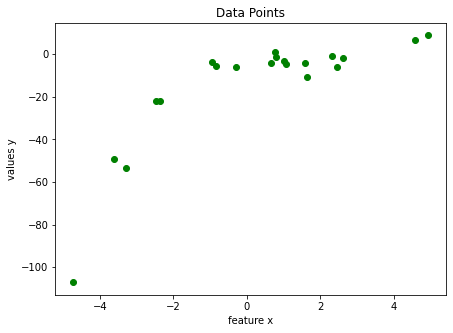

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.figure(figsize=(7,5))
plt.scatter(x,y,c='g')
plt.title('Data Points')
plt.xlabel('feature x')
plt.ylabel('values y')
plt.show()
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [13]:
# import linear regression module from sklearn
from sklearn.linear_model import SGDRegressor,LinearRegression
model=SGDRegressor(verbose=1) # new regressor object from SGDRegressor() class
model.fit(x,y) # fit >>> start training to find best params

-- Epoch 1
Norm: 4.25, NNZs: 1, Bias: -1.633786, T: 20, Avg. loss: 376.605362
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.56, NNZs: 1, Bias: -2.858113, T: 40, Avg. loss: 277.304696
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.66, NNZs: 1, Bias: -3.820213, T: 60, Avg. loss: 239.028146
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6.95, NNZs: 1, Bias: -4.696391, T: 80, Avg. loss: 220.895362
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 7.39, NNZs: 1, Bias: -5.435149, T: 100, Avg. loss: 207.286352
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.38, NNZs: 1, Bias: -6.110409, T: 120, Avg. loss: 197.589650
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.70, NNZs: 1, Bias: -6.715344, T: 140, Avg. loss: 189.545624
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.62, NNZs: 1, Bias: -7.278203, T: 160, Avg. loss: 182.913014
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 7.76, NNZs: 1, Bias: -7.782170, T: 180, Avg. loss: 178.051918
Total trainin

/home/mohamed-mossad/Projects/machine-learning-course/venv/local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [14]:
# show model coefs
print("theta_0",model.intercept_)
print("theta_1",model.coef_)

theta_0 [-16.47247541]
theta_1 [8.30878605]


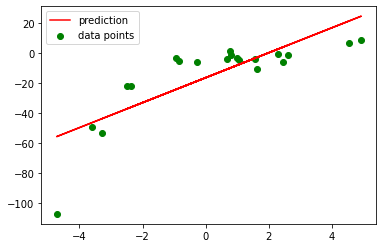

In [15]:
# plot model predictions vs actual values
y_pred=model.predict(x)
plt.scatter(x,y,label='data points',color='g')
plt.plot(x,y_pred,color='r',label='prediction')
plt.legend() # show legend
plt.show()

In [16]:
# to evaluate linear regression model we may need to compute MSE error
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_true=y,y_pred=y_pred)
print("MSE error for this model",error)

MSE error for this model 253.18201431128168


### feature engineering , how to develop good linear model

`in previous model , we note that it is suffering from an underfitting problem where straight line is not enough to learn from the data, to solve this we may need`
`to increase model complexity (increase model features)`

<img src='../../../images/lr_poly.png'>

In [17]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x) # check https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [18]:
# check new features
x_poly

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  4.56228722, 20.81446466]])

In [19]:
model2=SGDRegressor(verbose=1)
model2.fit(x_poly,y)

-- Epoch 1
Norm: 27.75, NNZs: 3, Bias: 0.738524, T: 20, Avg. loss: 3776.257399
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.46, NNZs: 3, Bias: -2.983588, T: 40, Avg. loss: 10324.866120
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.99, NNZs: 3, Bias: -2.718689, T: 60, Avg. loss: 418.108154
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.04, NNZs: 3, Bias: -2.808872, T: 80, Avg. loss: 1577.189542
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.78, NNZs: 3, Bias: -2.999396, T: 100, Avg. loss: 175.877983
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.42, NNZs: 3, Bias: -3.073171, T: 120, Avg. loss: 95.454600
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.02, NNZs: 3, Bias: -3.060649, T: 140, Avg. loss: 140.043535
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.50, NNZs: 3, Bias: -3.146278, T: 160, Avg. loss: 115.239266
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 9.91, NNZs: 3, Bias: -3.310274, T: 180, Avg. loss: 63.730339
Total trai

/home/mohamed-mossad/Projects/machine-learning-course/venv/local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [20]:
# show model coefs
print("theta_0",model2.intercept_)
print("theta_1",model2.coef_)

theta_0 [-3.33213593]
theta_1 [-3.33190525  9.32448099 -0.77675163]


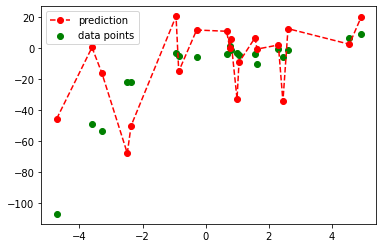

In [21]:
# plot model2 predictions vs actual values
y_pred2=model2.predict(x_poly)
plt.scatter(x,y,label='data points',color='g')
plt.plot(sorted(list(x.flatten())),y_pred2,linestyle='--', marker='o',color='r',label='prediction')
plt.legend() # show legend
plt.show()

In [22]:
error=mean_squared_error(y_true=y,y_pred=y_pred2)
print("MSE error for model with degree2",error)

MSE error for model with degree2 177.63138538650466
